## 주식 데이터의 데이터 타입 살펴보기



In [6]:
aapl <- read.csv("datas/aapl.csv", header = TRUE)

### 데이터 탐색

In [8]:
str(aapl)

'data.frame':	3347 obs. of  2 variables:
 $ Date : Factor w/ 3347 levels "2000-01-03","2000-01-04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Close: num  27.6 25.2 25.6 23.4 24.5 ...


In [9]:
# 요약정보가 출력된다.

summary(aapl)

# Min - 최소값
# 1st Qu - 하위 25% 지점에 해당하는 값
# Median - 중간에 위치하는 값 중 하나
# Mean - 평균값
# 3rd Qu - 상위 25% 지점에 해당하는 값, 하위 75% 
# Max - 최대값

         Date          Close       
 2000-01-03:   1   Min.   :  6.46  
 2000-01-04:   1   1st Qu.: 12.32  
 2000-01-05:   1   Median : 73.25  
 2000-01-06:   1   Mean   :144.17  
 2000-01-07:   1   3rd Qu.:198.13  
 2000-01-10:   1   Max.   :694.86  
 (Other)   :3341                   

#### 위의 값을 보고 예측해보기

- 평균과 중위수의 차이가 나는 것으로 볼 때
    - 종가값이 낮은적이 더 많고 급격히 오른 때도 있는 것 같다.
- 최소값과 25% 분위수의 값의 차이
    - 전체 기간에서 약 1/4 정도는 최소값과 근사한 종가
- 최대값과 75% 분위수의 값의 차이를 볼 때
    - 

평균과 중위수의 차이가 나는 것을 볼 때
- 일반적인 기준 평균보다 중위수가 낮은 쪽에 있으면 낮은 값이 많다.
- 평균보다 중위가 높은 쪽에 있으면 높은 값이 많다고 볼 수 있다.

- 두배 차이가 나는 것을 볼 때 

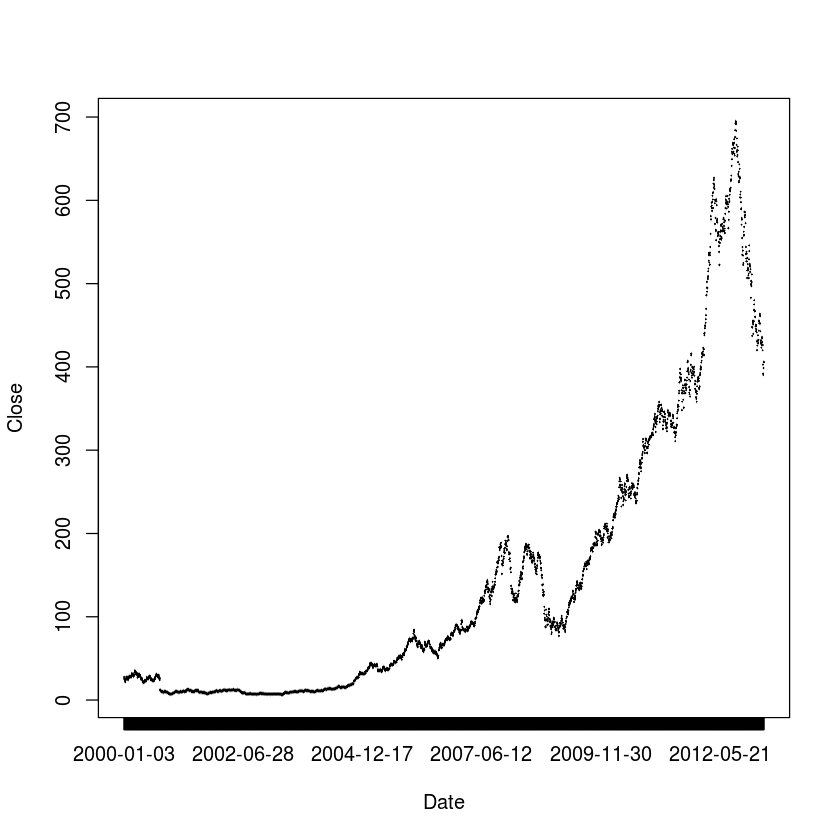

In [10]:
plot(aapl)

### 전처리

In [14]:
# 데이터셋$컬럼$

aapl$Date2 <- as.POSIXlt(aapl$Date)
aapl$year  <- aapl$Date2$year + 1900
aapl$mon   <- aapl$Date2$mon + 1
aapl$day   <- aapl$Date2$mday

In [16]:
?POSIXlt

In [18]:
# 요일

head(aapl$Date2$wday)
head(weekdays(aapl$Date2))

[1] 1 2 3 4 5 1

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Monday"

In [19]:
aapl$weekdays <- weekdays(aapl$Date2)

In [20]:
str(aapl)

'data.frame':	3347 obs. of  7 variables:
 $ Date    : Factor w/ 3347 levels "2000-01-03","2000-01-04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Close   : num  27.6 25.2 25.6 23.4 24.5 ...
 $ Date2   : POSIXlt, format: "2000-01-03" "2000-01-04" ...
 $ year    : num  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ mon     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ day     : int  3 4 5 6 7 10 11 12 13 14 ...
 $ weekdays: chr  "Monday" "Tuesday" "Wednesday" "Thursday" ...


In [21]:
# 전처리 후 저장

save(aapl, file = "datas/aapl.RDATA")

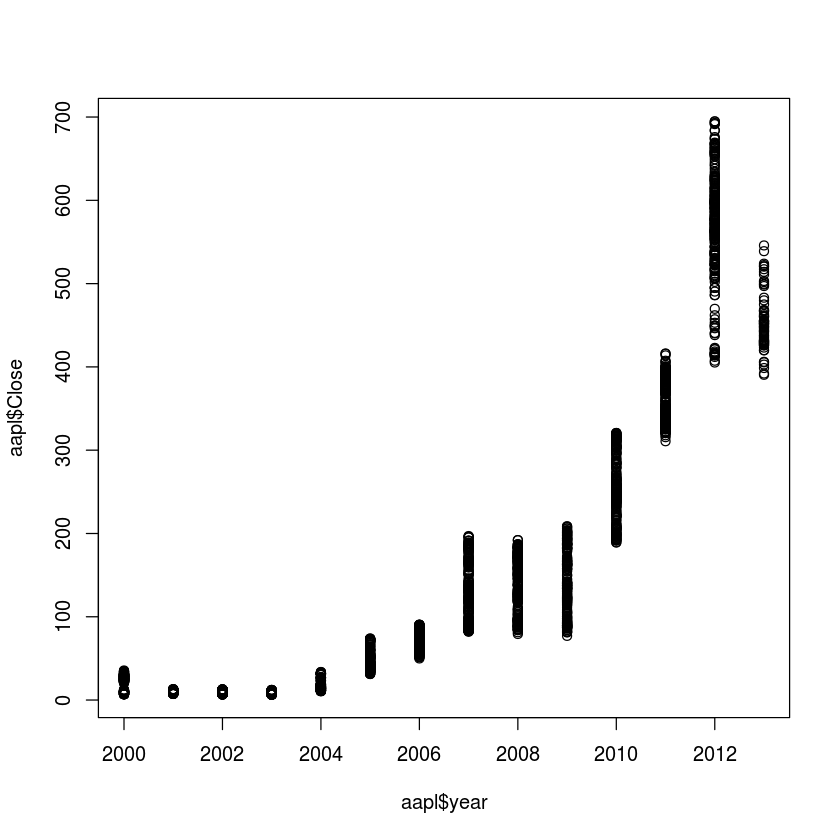

In [22]:
plot(aapl$year, aapl$Close)

In [23]:
aapl_sub <- subset(aapl, year >= 2010 & year != 2013)
str(aapl_sub$year)

 num [1:754] 2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


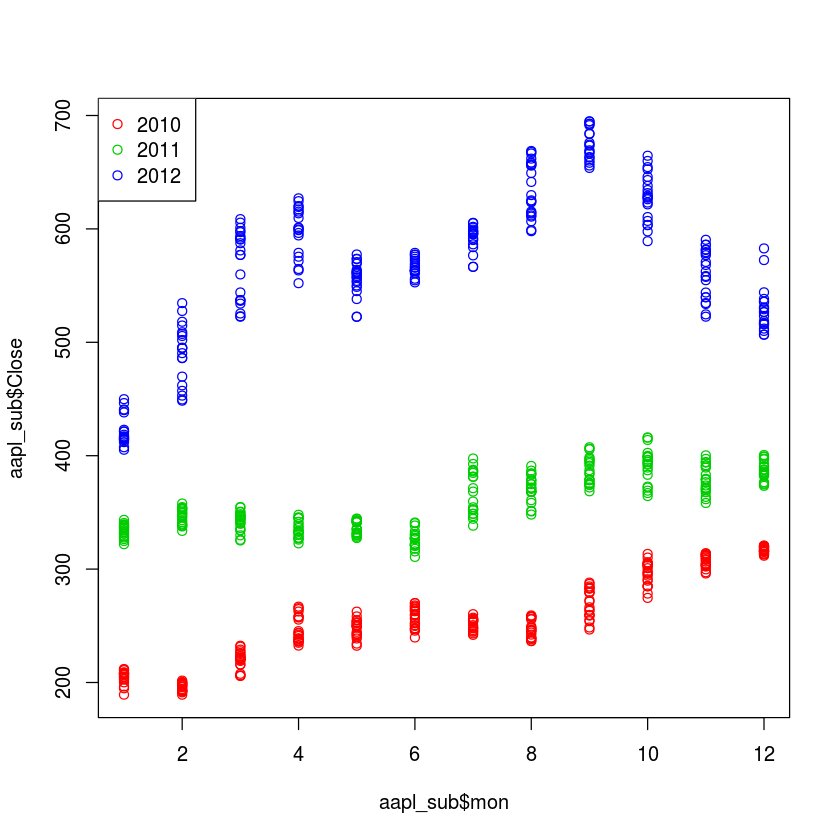

In [26]:
plot(aapl_sub$mon, aapl_sub$Close, col = as.integer(aapl_sub$year))
legend("topleft", legend = levels(factor(aapl_sub$year)),
       col = levels(factor(aapl_sub$year)), pch = 1
)

## Factor object
P.142

- 코드형 데이터 (category) 값을 저장하기 위하여
- 기본적인 사칙연산은 안되지만 ordered() 로 우선순위를 부여하고 연산은 가능하다.
- levels 로 범주 목록이 있다. 범주목록 외의 값을 입력하면 NA (Not Available)

In [29]:
?factor()

In [30]:
vG <- c("very_bad", "bad", "normal", "good", "very_good")
fvG <- factor(vG)

In [31]:
# level 로 범주 목록을 알 수 있고, 기본값은 알파벳 순

levels(fvG)[1]

[1] "bad"

#### Factor 실습해보기

In [33]:
gender <- factor(c("f", "m", "f"), c("f", "m"))
gender

[1] f m f
Levels: f m

In [34]:
levels(gender)

[1] "f" "m"

In [35]:
# 갯수

nlevels(gender)

[1] 2

In [37]:
nlevels(fvG)

[1] 5

#### Factor 에 서열성 부여하기

- 기본값으로 분류되면 내가 원하지 않는 순서로 분류되는 일이 있으니
- 순위를 내가 지정하자.

In [39]:
ord_vG <- ordered(vG, levels = c("very_bad", "bad", "normal", "good", "very_good"))

In [40]:
ord_vG

[1] very_bad  bad       normal    good      very_good
Levels: very_bad < bad < normal < good < very_good

In [44]:
levels(ord_vG) <- c("v_b", "b", "n", "g", "v_g")

In [45]:
ord_vG

[1] v_b b   n   g   v_g
Levels: v_b < b < n < g < v_g

#### 서열척도

In [46]:
# 기본 데이터셋 준비

install.packages("Fahrmeir")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [47]:
library(Fahrmeir)

In [48]:
data(rheuma)

#### rheuma 데이터셋 살펴보기

In [49]:
str(rheuma)

'data.frame':	10 obs. of  3 variables:
 $ Drug       : Factor w/ 2 levels "Active.control",..: 2 2 2 2 2 1 1 1 1 1
 $ Improvement: Ord.factor w/ 5 levels "Much.worse"<"Worse"<..: 1 2 3 4 5 1 2 3 4 5
 $ n          : int  24 37 21 19 6 11 51 22 21 7


In [52]:
?rheuma

A data frame with 10 observations on the following 3 variables.

##### Drug
a factor with levels Active.control New.agent

##### Improvement
an ordered factor with levels Much.worse <  Worse < No.change < Improved <  Much.improved

##### n
number of patients in group

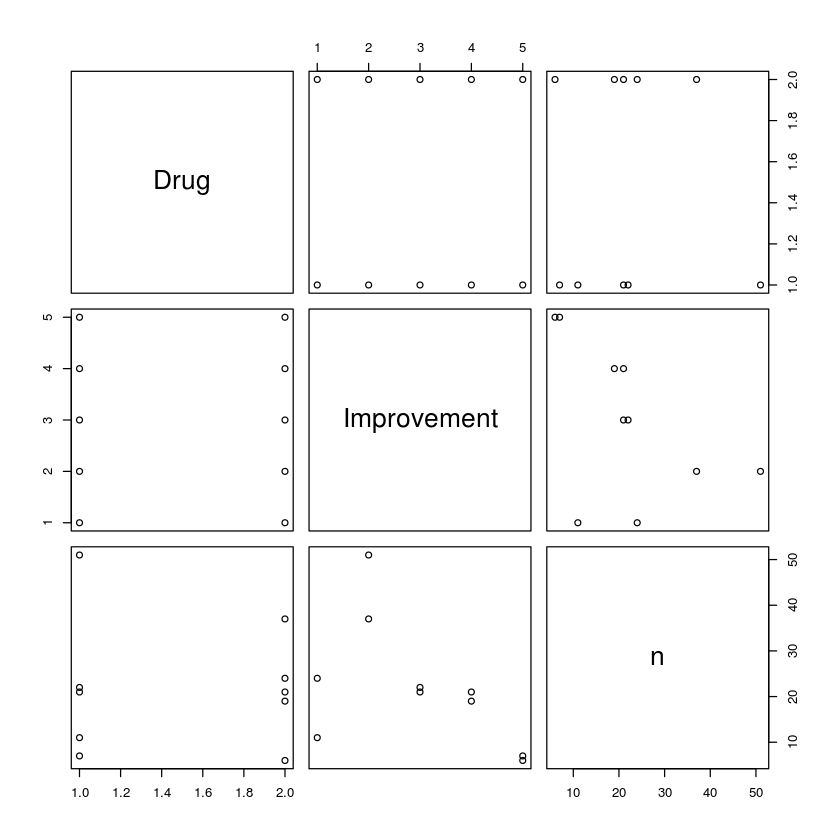

In [50]:
plot(rheuma)

In [51]:
summary(rheuma)

             Drug          Improvement       n       
 Active.control:5   Much.worse   :2    Min.   : 6.0  
 New.agent     :5   Worse        :2    1st Qu.:13.0  
                    No.change    :2    Median :21.0  
                    Improved     :2    Mean   :21.9  
                    Much.improved:2    3rd Qu.:23.5  
                                       Max.   :51.0  

#### Factor NA 처리

In [55]:
fX <- factor(c("KA", "AS", NA, "EU", "NA", "SA"))
print(fX)

[1] KA   AS   <NA> EU   NA   SA  
Levels: AS EU KA NA SA


### 구급 사고 발생 데이터에서 "가정" Level 에서 발생한 데이터만 추출

In [58]:
emergency_14 <- read.csv("datas/d_icheon_emergency_14_2.csv", header = TRUE)

In [59]:
summary(emergency_14)

    집계년도              출동안전센터명   신고년월일          신고시각   
 Min.   :2014   관고119안전센터  :5208   Min.   :20140101   9:48   :  18  
 1st Qu.:2014   대월119안전센터  :2260   1st Qu.:20140404   9:39   :  17  
 Median :2014   장호원119안전센터:1297   Median :20140622   11:26  :  16  
 Mean   :2014                            Mean   :20140676   18:18  :  15  
 3rd Qu.:2014                            3rd Qu.:20141007   11:21  :  14  
 Max.   :2014                            Max.   :20141226   12:58  :  14  
                                                            (Other):8671  
     접수경로       현장거리           환자연령      환자성별구분명 외국인여부
 휴대전화:6333   Min.   :   0.000   Min.   :  1.00       :2941      N:8707    
 일반전화:1903   1st Qu.:   2.000   1st Qu.: 36.00   남  :3476      Y:  58    
 기타    : 275   Median :   4.000   Median : 53.00   미상:   3                
 인편    : 191   Mean   :   7.132   Mean   : 53.56   여  :2345                
 사후각지:  34   3rd Qu.:   9.000   3rd Qu.: 71.00                            
 공중전화:  2

In [61]:
family <- subset(emergency_14, 구급발생장소유형 == "가정")

In [62]:
summary(family)

    집계년도              출동안전센터명   신고년월일          신고시각   
 Min.   :2014   관고119안전센터  :1741   Min.   :20140101   10:13  :   8  
 1st Qu.:2014   대월119안전센터  : 924   1st Qu.:20140322   8:40   :   8  
 Median :2014   장호원119안전센터: 592   Median :20140610   9:09   :   8  
 Mean   :2014                            Mean   :20140654   10:04  :   7  
 3rd Qu.:2014                            3rd Qu.:20141006   10:09  :   7  
 Max.   :2014                            Max.   :20141226   10:19  :   7  
                                                            (Other):3212  
     접수경로       현장거리          환자연령      환자성별구분명 외국인여부
 휴대전화:2205   Min.   :  0.000   Min.   :  1.00       : 306      N:3244    
 일반전화: 890   1st Qu.:  2.000   1st Qu.: 44.00   남  :1528      Y:  13    
 기타    :  93   Median :  4.000   Median : 61.00   미상:   0                
 인편    :  54   Mean   :  6.072   Mean   : 58.12   여  :1423                
 사후각지:  11   3rd Qu.:  9.000   3rd Qu.: 77.00                            
 공중전화:   4   Ma

In [63]:
dim(family)

[1] 3257   19

In [64]:
notFamily <- subset(emergency_14, 구급발생장소유형 != "가정")

In [72]:
notFamily$구급발생장소유형 <- factor(notFamily$구급발생장소유형)
family$구급발생장소유형 <- factor(family$구급발생장소유형)

In [73]:
summary(notFamily)

    집계년도              출동안전센터명   신고년월일          신고시각   
 Min.   :2014   관고119안전센터  :3467   Min.   :20140101   11:26  :  14  
 1st Qu.:2014   대월119안전센터  :1336   1st Qu.:20140411   13:02  :  13  
 Median :2014   장호원119안전센터: 705   Median :20140627   20:15  :  13  
 Mean   :2014                            Mean   :20140688   9:48   :  13  
 3rd Qu.:2014                            3rd Qu.:20141007   18:18  :  12  
 Max.   :2014                            Max.   :20141226   7:39   :  12  
                                                            (Other):5431  
     접수경로       현장거리           환자연령      환자성별구분명 외국인여부
 휴대전화:4128   Min.   :   0.000   Min.   :  1.00       :2635      N:5463    
 일반전화:1013   1st Qu.:   2.000   1st Qu.: 32.00   남  :1948      Y:  45    
 기타    : 182   Median :   4.000   Median : 48.00   미상:   3                
 인편    : 137   Mean   :   7.804   Mean   : 48.87   여  : 922                
 사후각지:  23   3rd Qu.:   9.500   3rd Qu.: 60.00                            
 공중전화:  1

In [74]:
levels(family$구급발생장소유형)

[1] "가정"

In [75]:
가정만 <- family

In [76]:
가정만

,집계년도,출동안전센터명,신고년월일,신고시각,접수경로,현장거리,환자연령,환자성별구분명,외국인여부,국적명,구급발생장소유형,환자증상유형,구급사고종별상위명,구급사고종별하위명,환자발생유형,의식상태유형,구급반장자격등급,구급대원자격등급,구조활동장애원인
1,2014,관고119안전센터,20140102,2:18,일반전화,14.0,81,여,N,,가정,비출혈,질병,"고혈압,당뇨",,A(Alert),간호사,,
2,2014,대월119안전센터,20140117,16:31,휴대전화,3.0,78,여,N,,가정,고열,질병,기타,,Drowsy,응급구조사(2급),,
3,2014,대월119안전센터,20140117,18:37,기타,14.0,64,남,N,,가정,기타통증,사고부상,낙상,낙상,A(Alert),응급구조사(1급),,
4,2014,대월119안전센터,20140118,10:14,휴대전화,8.0,3,여,N,,가정,고열,질병,기타,,A(Alert),응급구조사(1급),,
5,2014,대월119안전센터,20140118,12:28,휴대전화,7.0,88,여,N,,가정,전신쇠약,질병,"뇌혈관질환,고혈압,당뇨",,A(Alert),응급구조사(1급),,
7,2014,대월119안전센터,20140118,17:15,휴대전화,6.5,48,여,N,,가정,기타통증,사고부상,기타 둔상,기타 둔상,A(Alert),응급구조사(1급),,
8,2014,대월119안전센터,20140118,22:26,휴대전화,4.0,15,여,N,,가정,복통,질병,기타,,A(Alert),응급구조사(1급),,
9,2014,대월119안전센터,20140118,22:49,휴대전화,11.0,57,남,N,,가정,기타통증,질병,기타,,A(Alert),응급구조사(1급),,
10,2014,장호원119안전센터,20140110,10:42,휴대전화,14.0,35,여,N,,가정,기타통증,질병,기타,,A(Alert),간호사,,
11,2014,장호원119안전센터,20140111,6:58,휴대전화,1.0,22,남,N,,가정,기타통증,질병,기타,,A(Alert),간호사,응급구조사(2급),


## 기술 통계량
#### 5점 척도로 작성된 질문에 대한 응답을, 수치형으로 변환하여 기술통계량 산출

- 데이터를 처리하다보면 factor 를 연산해야 한다.
- 통계 분석을 위해서는 코드값을 수치로 변환하여야 한다.
- as.double() 함수를 이용해 수치화하면 연산이 가능하다.

In [80]:
vG <- c("very_bad", "bad", "normal", "good", "very_good")


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [81]:
# 서열성을 부여한다.

#vG <- ordered(vG, levels = c("very_bad", "bad", "normal", "good", "very_good"))

# 이미 서열성을 갖고 있다면 그냥 기존 데이터를 부르면 된다.


vG <- ordered(vG, levels = c(vG))

In [83]:
vG_numberic <- as.double(vG)
summary(vG_numberic)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       3       3       4       5 

## Matrix Object - Chapter 08

- vector : 차원이 없다.
- matrix : vector 에 차원이 생김


In [88]:
mX <- matrix(1:6, ncol = 2) # ncol = number column
mX

1,4
2,5
3,6


In [87]:
mX <- matrix(1:6, nrow = 2)
mX

1,3,5
2,4,6


In [89]:
# row 순으로 데이터를 채워나감

mX <- matrix(1:6, 3, 2, byrow = T) # 3 행 2 열
mX

1,2
3,4
5,6


#### Dimension 함수

In [93]:
mX2 <- 1:6
print(mX2)

[1] 1 2 3 4 5 6


In [94]:
dim(mX2) <- c(3, 2) # (3행 2열로 기존 데이터를 정렬)

In [95]:
mX2

1,4
2,5
3,6


#### matrix 구조 읽기 쓰기 수정 삭제 (CRUD)

In [97]:
mM1 <- rbind(c(101, 103), c(201, 202, 203), c(301, 302, 303))

Warning message in rbind(c(101, 103), c(201, 202, 203), c(301, 302, 303)):
“number of columns of result is not a multiple of vector length (arg 1)”

In [98]:
mM3 <- rbind(c(101, 102, 103), c(201, 202, 203), c(301, 302, 303))

In [99]:
# 조건에 따라 값 리턴하기

mM3[mM3 > 100]

[1] 101 201 301 102 202 302 103 203 303

In [100]:
mM3[mM3[,3] > 300]

[1] 301 302 303

In [101]:
mM3[mM3[,3] > 300 ,, drop = F]

301,302,303


# 174 쪽 문제 풀어보기

### logical 값을 인덱스로 이용할 경우 (P. 178)

In [102]:
mX <- rbind(c(101, 102, 103), c(201, 202, 203), c(111, 222, 333))
mX

101,102,103
201,202,203
111,222,333


In [103]:
mX > 200

FALSE,FALSE,FALSE
TRUE,TRUE,TRUE
FALSE,TRUE,TRUE


In [104]:
mX[mX > 200]

[1] 201 202 222 203 333

In [105]:
mY <- mX

In [106]:
mY[mY > 200] <- 0
mY

101,102,103
0,0,0
111,0,0


#### diag (대각) 이용한 대각 행렬

In [107]:
mX3 <- diag(2, 3, 3)

In [108]:
diag(mX) <- c(1, 2, 3)
mX

1,102,103
201,2,203
111,222,3


#### P. 191 colnames(), rownames()

In [110]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [111]:
?mtcars

In [113]:
co1 <- colnames(mtcars)
#co1 <- names(mtcars) # 도 동작합니다.
co1

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [114]:
ro1 <- rownames(mtcars)

#### P. 198 과제

In [115]:
mX <- matrix(1:6, 3, 2)
mX

1,4
2,5
3,6


In [117]:
mX <- matrix(1:6, 2, 3)
print(mX)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6


In [123]:
tex1 <- c("1", "2", "3", "4", "5,", "6", "7", "8", "9")
mXtex <- matrix(tex1)
mXtex

1
2
3
4
"5,"
6
7
8
9


In [124]:
mXtexnume <- matrix(tex1, colClass = c("numeric"))

ERROR: Error in matrix(tex1, colClass = c("numeric")): unused argument (colClass = c("numeric"))


In [125]:
tex1_inte <- as.integer(tex1)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [126]:
tex1_inte

[1]  1  2  3  4 NA  6  7  8  9

## 교차표 만들기

In [130]:
xtabs(mpg ~ gear + cyl, data = mtcars)

# 

    cyl
gear     4     6     8
   3  21.5  39.5 180.6
   4 215.4  79.0   0.0
   5  56.4  19.7  30.8

In [128]:
?xtabs

In [131]:
tapply(mtcars$mpg, list(mtcars$gear, mtcars$cyl), length)

,4,6,8
3,1,2,12
4,8,4,NA
5,2,1,2


In [132]:
xtabs(mpg ~ gear + cyl, data = mtcars)
xtabs(mpg ~ gear + cyl, data = mtcars) / tapply(mtcars$mpg, list(mtcars$gear, mtcars$cyl), length)

    cyl
gear     4     6     8
   3  21.5  39.5 180.6
   4 215.4  79.0   0.0
   5  56.4  19.7  30.8

    cyl
gear      4      6      8
   3 21.500 19.750 15.050
   4 26.925 19.750       
   5 28.200 19.700 15.400

#### Auto 와 Manual 인 차량에 대해 기어와 실린더 갯수를 비교하여 연비 효율 분석

In [138]:
a <- xtabs(mpg ~ cyl + gear + am, data = mtcars)
b <- tapply(mtcars$mpg, list(mtcars$gear, mtcars$cyl), length)

a / b

ERROR: Error in a/b: non-conformable arrays


In [139]:
xtabs(mpg ~ cyl + gear + am, data = mtcars)

, , am = 0

   gear
cyl     3     4     5
  4  21.5  47.2   0.0
  6  39.5  37.0   0.0
  8 180.6   0.0   0.0

, , am = 1

   gear
cyl     3     4     5
  4   0.0 168.2  56.4
  6   0.0  42.0  19.7
  8   0.0   0.0  30.8
